### 3d_examples.ipynb
#### This is a notebook covering different examples of how to use the 3d.jl component of REK.

In [1]:
# First: include the 3d.jl script to use its functions

include("3d.jl")

norm_onset_mean (generic function with 5 methods)

In [2]:
# Let's run a small simulation of an axial range expansion assuming the finite-site model
# REK's methods are maximally simplified and usually have default values for most arguments. In this case, a simulation of 10 + 10 generations (burn-in + expansion) is run
# It is possible to pass a world (habitat) as an argument, but for now, the method will generate a default world
# You can always reference the function descriptions to find out more about them

test = rangeexp_fin_axial()

Dict{String, Any} with 9 entries:
  "AAsel" => NaN
  "pops"  => Int32[0 0 … 0 0; 0 0 … 20 0; … ; 0 0 … 0 0; 0 0 … 0 0;;; 0 3 … 2 0…
  "aasel" => NaN
  "meanf" => Float32[-1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … 0.05 -1.0; … ; -1.0 -1.…
  "aaneu" => NaN
  "Aasel" => NaN
  "Aaneu" => NaN
  "AAneu" => NaN
  "stats" => Dict{String, Any}("y_max_burnin"=>10, "x_max"=>100, "migr_dirs"=>[…

In [3]:
# The output is a dictionary with multiple data arrays
# For the sake of economising resources, you have to specify which data are returned. "pops" (deme populations) and "meanf" (deme-average fitness) are specified by default
# There is also a statistics array always returned

test["stats"]

Dict{String, Any} with 22 entries:
  "y_max_burnin"     => 10
  "x_max"            => 100
  "migr_dirs"        => [[-1, 0], [0, -1], [0, 1], [1, 0]]
  "r_prolif_rate"    => 1.8
  "name"             => "2024-06-05_21-06-00"
  "s_sel_coef"       => 0.002
  "n_gens_burnin"    => 10
  "x_max_burnin"     => 5
  "k_capacity"       => 20
  "y_max"            => 10
  "prop_of_del_muts" => 0.9
  "migr_rate"        => 0.1
  "sel_loci"         => [43, 431, 913, 774, 191, 801, 573, 582, 626, 175  …  21…
  "y_startfill"      => 10
  "n_gens"           => 30
  "x_startfill"      => 5
  "n_gens_exp"       => 20
  "mut_rate"         => 0.7567
  "h_domin_coef"     => 0
  ⋮                  => ⋮

In [ ]:
# This shows different statistics about the world as well as the range expansion
# Now, let's return to look at some data that we got
# REK has a selection of unique plotting functions that start with *re_plot_* or *re_heatmap_*. These aid in viewing the data returned in *rangeexp_* function, relying on a couple of data visualisation packages
# Let's plot the population ("pops") distribution in each deme in time

re_heatmap(test["pops"])

In [ ]:
# There is a simpler way to plot, that also takes into account the specifics of the plotted data type: *re_heatmap_%%%*, where %%% is the data
# For example, the following shows the same population distribution

re_heatmap_pops(test)

In [6]:
# Just as an example, let's run another simulation, this time specifying more generations, a smaller y-size for our world, a name, and that all data outputs should be returned

test = rangeexp_fin_axial(15,30;y_max=5,name="my test",data_to_generate="FPMS")

Dict{String, Any} with 9 entries:
  "AAsel" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "pops"  => Int32[0 0 … 0 0; 0 0 … 21 0; … ; 0 0 … 0 0; 0 0 … 0 0;;; 0 0 … 0 0…
  "aasel" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 500.0 0.0; … ; 0.0 0.0 … 0.0 …
  "meanf" => Float32[-1.0 -1.0 … -1.0 -1.0; -1.0 -1.0 … 0.05 -1.0; … ; -1.0 -1.…
  "aaneu" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 500.0 0.0; … ; 0.0 0.0 … 0.0 …
  "Aasel" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "Aaneu" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "AAneu" => Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "stats" => Dict{String, Any}("y_max_burnin"=>10, "x_max"=>100, "migr_dirs"=>[…

In [ ]:
# Let's plot the evolution of deme-average fitness in time

re_heatmap_meanf(test)

In [ ]:
# Let's also see what that deme-average heterozygosity distribution looks like (on a stringent logarithmic scale)

re_heatmap_Aasel(test;log_base=1.00001,clim=(0,50))

In [ ]:
# Since the (default) value of n_sel_loci (the number of selected loci out of n_loci=1000) in this simulation is 500, let's run a quick test to confirm that AA+Aa+aa=500

re_heatmap(test["AAsel"]+test["Aasel"]+test["aasel"];clim=(0,640))

In [ ]:
# REK also includes methods that operate with the population front
# For example, we can get only the front values of deme-average fitness with the following

test_meanf_frontarr = front_array(test,"meanf";oneside=true)
re_heatmap_meanf(test_meanf_frontarr,1,20)

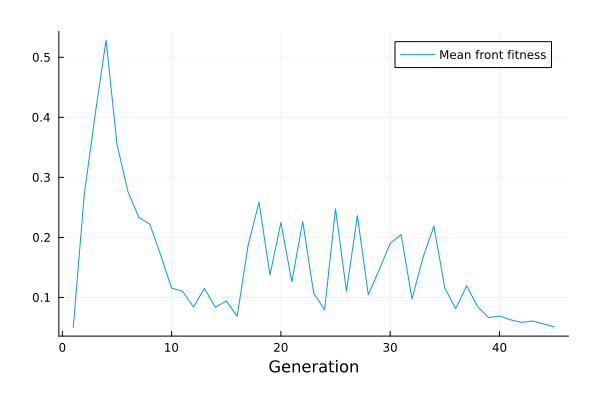

In [22]:
# And with the following, we can find the mean front fitness, and then plot its evolution in time

test_meanf_frontav = average_front(test,"meanf")
plot(test_meanf_frontav,xlabel="Generation",label="Mean front fitness")

In [25]:
function average_all(data::Array,n_gens::Int;leqzero=false,divide=true)
    res = Array{Float64}(undef,0)
    for j in 1:n_gens
        push!(res,mean(skipmissing(data[:,:,j])))
    end
    return res
end
function average_all(re::Dict,dataname::String;leqzero=false,divide=true)
    res = Array{Float64}(undef,0)
    for j in 1:re["stats"]["n_gens"]
        push!(res,mean(skipmissing(re[dataname][:,:,j])))
    end
    return res
end

average_all (generic function with 4 methods)

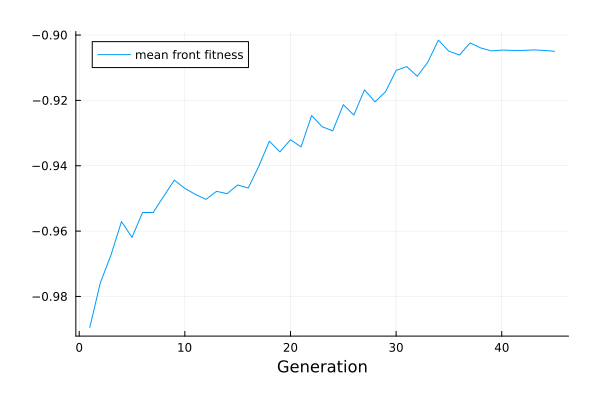

In [26]:
# Likewise, we can find the population average

test_meanf_av = average_all(test,"meanf")
plot(test_meanf_av,xlabel="Generation",label="mean front fitness")